In [2]:
import config
from datasets import load_dataset
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pathlib import Path
import seaborn as sns
import utils

In [3]:
fig_save_path = Path("figures")
fig_save_path.mkdir(exist_ok=True)

In [4]:
# Load the OneStopQA dataset
onestop_qa = load_dataset(
    "onestop_qa", split="train", trust_remote_code=True
).to_pandas()

In [ ]:
QUESTIONNAIRE = utils.load_json(config.QUESTIONNAIRE_PATH)
SESSION_SUMMARY = utils.load_df(config.SESSION_SUMMARY_PATH)

In [6]:
IA_P = utils.load_df(config.IA_P_PATH)
IA_Q = utils.load_df(config.IA_Q_PATH)
IA_A = utils.load_df(config.IA_A_PATH)
IA_Q_preview = utils.load_df(config.IA_Q_preview_PATH)
IA_T = utils.load_df(config.IA_T_PATH)
IA_QA = utils.load_df(config.IA_QA_PATH)

/Users/ellalion/OneStop-Eye-Movements/src/utils.py:11: DtypeWarning: Columns (126) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_table(path, encoding="utf-16")


# 1.1.1 Key Statistics

In [11]:
# Calculate the lengths
p = len(IA_P.query("practice==0"))
q = len(IA_Q.query("practice==0"))
a = len(IA_A.query("practice==0"))
q_pre = len(IA_Q_preview.query("practice==0"))
t = len(IA_T.query("practice==0"))
total = p + q + a + t + q_pre

# Consolidated print statement
print(
    f"Number of tokens in IA reports:\nparagraphs - {p}\nquestions - {q}\nquestions and answers - {a}\nquestions preview - {q_pre}\ntitles - {t}\ntotal words - {total}"
)

Number of tokens in IA reports:
paragraphs - 2252443
questions - 201044
questions and answers - 868682
questions preview - 101369
titles - 30102
total words - 3453640


# 1.1.2 Participants

In [5]:
print(f"Total number of participants: {len(SESSION_SUMMARY)}")

Total number of participants: 360


In [16]:
# Questionnaire json to dataframe filled missing values with NaN
questionnaire_df = pd.DataFrame(QUESTIONNAIRE)

In [17]:
# gender
gender = questionnaire_df["Gender"]
labels, counts = np.unique(gender, return_counts=True)
print(
    f"{labels[0]} - {counts[0]}, {labels[1]} - {counts[1]}, {labels[2]} - {counts[2]}"
)

female - 238, male - 117, other - 5


In [8]:
# age
print(f'mean age - {round(np.mean(questionnaire_df["Age"]),1)}')
print(f'std age - {round(np.std(questionnaire_df["Age"]),1)}')

print(
    f"Age mean - {round(questionnaire_df['Age'].mean(), ndigits=1)}, Age std - {round(questionnaire_df['Age'].std(), 1)}"
)

mean age - 22.8
std age - 5.7
Age mean - 22.8, Age std - 5.8


In [12]:
# Balanced Bilinguals
counter = 0
for languages in questionnaire_df["Languages"]:
    if isinstance(languages, list):
        for lang in languages: 
            if lang.get("Language Proficiency") == "native":
                counter += 1
print(f"Number of balanced bilinguals: {counter}")

# Number of Additional Languages
par_dict = {}
participants_additional_languages = questionnaire_df["Languages"]
par_languages = []
speak = []
for participant_add_lang in participants_additional_languages:
    if isinstance(participant_add_lang, list):
        for l in participant_add_lang:
            par_languages.append(l.get("Language"))  
        speak.append(len(participant_add_lang))
    else:
        participant_add_lang = ""
        speak.append(len(participant_add_lang))
lang, counts = np.unique(par_languages, return_counts=True)
language = dict(zip(lang, counts))
num_of_l, c = np.unique(speak, return_counts=True)
num_of_languages = dict(zip(num_of_l, c))
plus_5 = [min(p_5, 5) for p_5 in speak]
num_of_l_5, c_5 = np.unique(plus_5, return_counts=True)
num_of_lang_plus_5 = dict(zip(num_of_l_5, c_5))

Number of balanced bilinguals: 29


In [9]:
# The mean English Age of Acquisition
print(
    f'Mean age of acquisition (AoA) - {round(np.mean(questionnaire_df["English AoA"]),1)}'
)

Mean age of acquisition (AoA) - 0.4


In [10]:
# participants university affiliation
uni_affiliation = sum(questionnaire_df["University Affiliation"] == "yes")
print(f"Number of participants with university affiliation: {uni_affiliation}")

uni_institutions = questionnaire_df["University Institution"].dropna()
institution_mapping = {
    "mit": "MIT",
    "Technion": "Technion",
    }
uni_institutions_grouped = uni_institutions.apply(lambda x: institution_mapping.get(x, "Other"))

institutions_labels, institutions_counts = np.unique(uni_institutions_grouped, return_counts=True)
print("University Institutions and their counts:")
for i_label, i_count in zip(institutions_labels, institutions_counts):
    print(f"{i_label}: {i_count}")

uni_roles = questionnaire_df["University Role"].dropna()
roles_mapping = {
    "undergrad": "Undergrad",
    "grad": "Grad",
    "faculty": "Faculty",
    "admin": "Admin",
    }
uni_roles_grouped = uni_roles.apply(lambda x: roles_mapping.get(x, "Other"))
role_labels, role_counts = np.unique(uni_roles_grouped, return_counts=True)
print("University Roles and their counts:")
for r_label, r_count in zip(role_labels, role_counts):
    print(f"{r_label}: {r_count}")


Number of participants with university affiliation: 289
University Institutions and their counts:
MIT: 207
Other: 63
Technion: 19
University Roles and their counts:
Admin: 4
Faculty: 13
Grad: 39
Other: 8
Undergrad: 225


/var/folders/xz/v_bn9sxn4ld2lw3b85g8bpmw0000gn/T/ipykernel_35385/3840487682.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set(xticklabels=education_labels)
/var/folders/xz/v_bn9sxn4ld2lw3b85g8bpmw0000gn/T/ipykernel_35385/3840487682.py:35: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[2].set(xticklabels=add_lang_labels)


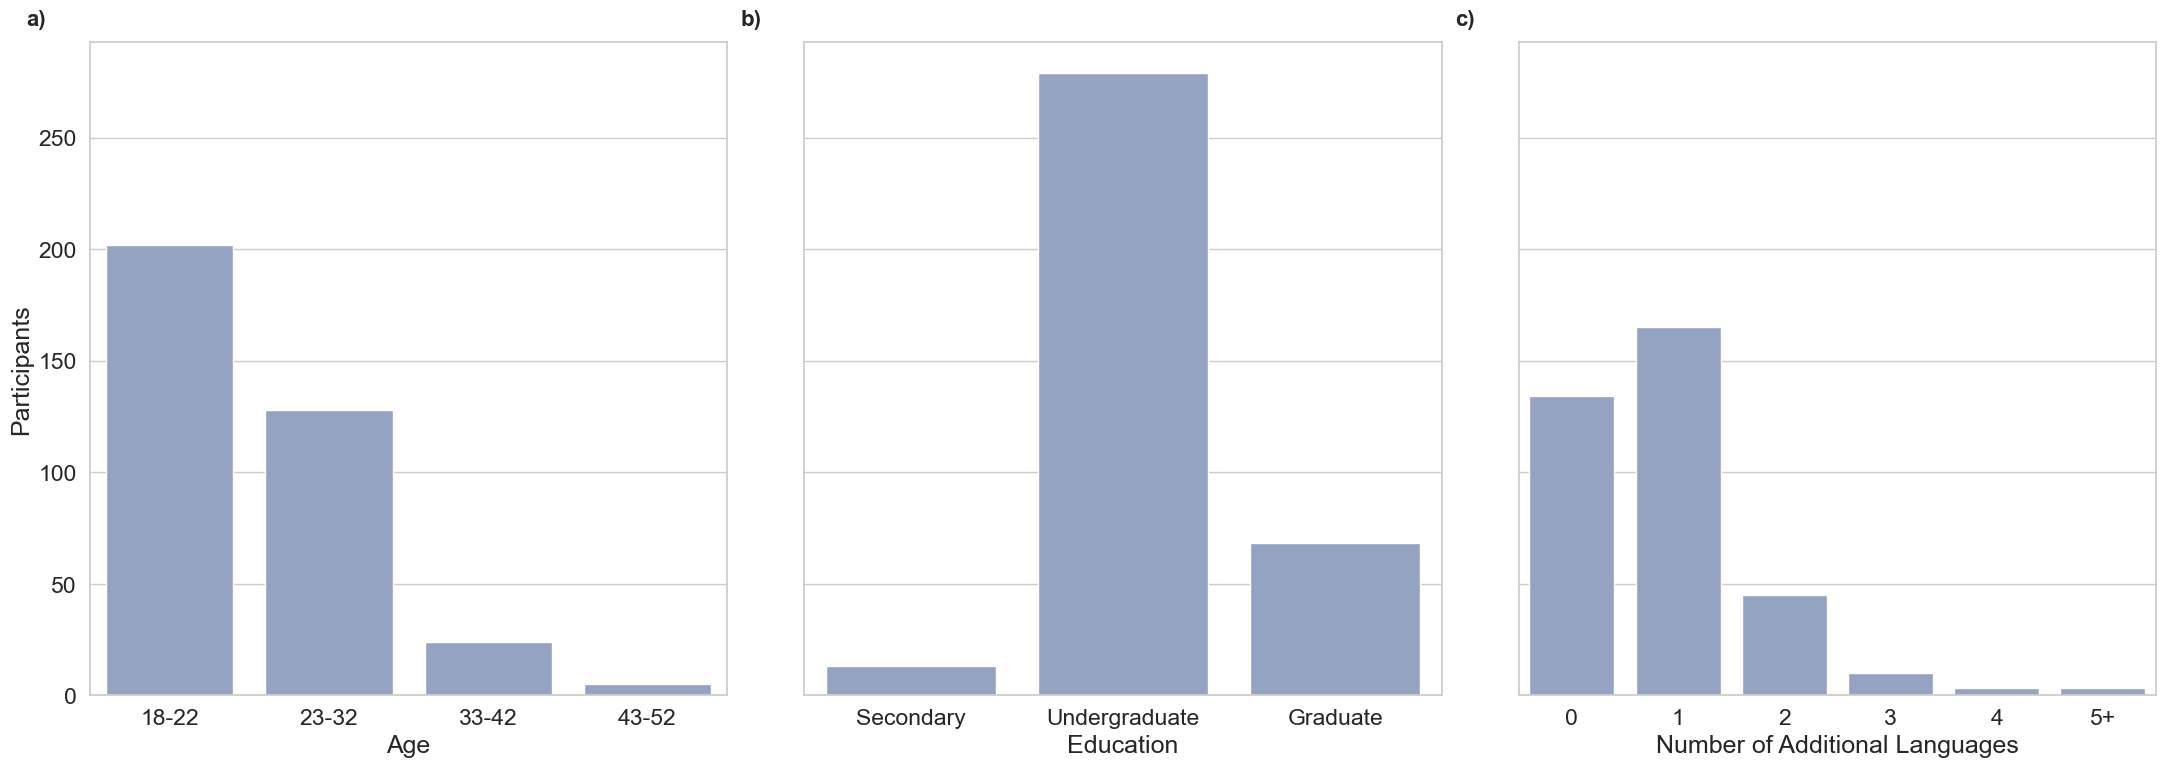

In [13]:
# Create Figure 1: Demographics
sns.set_context("paper", font_scale=2)
sns.set_theme(font_scale=1.5, style="whitegrid")
fig_colors = "#8da0cb"  # "#a1c9f4"
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(22, 8), sharey="row")
sns.set_style("whitegrid")

# Plot 1: Countplot for Age
age_bins = [18, 22, 32, 42, 52]
age_labels = ["18-22", "23-32", "33-42", "43-52"]
data = questionnaire_df.copy()
data["age_category"] = pd.cut(data["Age"], bins=age_bins, labels=age_labels, right=False)
sns.countplot(data=data, x="age_category", color=fig_colors, ax=axes[0], order=age_labels)
axes[0].set(ylabel="Participants")
axes[0].set(xlabel="Age")

# Plot 2: Countplot for Level of Education
education_order = ["secondary", "college", "postgrad"]
education_labels = ["Secondary", "Undergraduate", "Graduate"]
sns.countplot(data=data, x="Education Level", color=fig_colors, ax=axes[1], order=education_order)
axes[1].set(xticklabels=education_labels)
axes[1].set(ylabel="")
axes[1].set(xlabel="Education")

# Plot 3: Barplot for Number of Additional Languages
add_lang_labels = ["0", "1", "2", "3", "4", "5+"]
axes[2] = sns.barplot(
    x=list(num_of_lang_plus_5.keys()),
    y=list(num_of_lang_plus_5.values()),
    color=fig_colors,
    ax=axes[2],
)
axes[2].set(ylabel="")
axes[2].set(xlabel="Number of Additional Languages")
axes[2].set(xticklabels=add_lang_labels)

# Add labels (a, b, c) to each subplot
axes[0].text(
    -0.1,
    1.05,
    "a)",
    transform=axes[0].transAxes,
    fontsize=16,
    fontweight="bold",
    va="top",
)
axes[1].text(
    -0.1,
    1.05,
    "b)",
    transform=axes[1].transAxes,
    fontsize=16,
    fontweight="bold",
    va="top",
)
axes[2].text(
    -0.1,
    1.05,
    "c)",
    transform=axes[2].transAxes,
    fontsize=16,
    fontweight="bold",
    va="top",
)

# Adjust layout
plt.tight_layout()

# Save the plot as pdf
plt.savefig(fig_save_path / "demographics.pdf")

# Show the plot
plt.show()

## 1.1.3 Calibration Quality

In [6]:
# mean number of calibration sessions during an experiment
session_interruptions = SESSION_SUMMARY["Recalibration Count"]
print(f"Mean number of recalibrations: {round(np.mean(session_interruptions),1)}")

# mean number of calibration attempts per calibration session
mean_calibrations_per_session = sum(SESSION_SUMMARY["Total Recalibrations"]) / sum(SESSION_SUMMARY["Recalibration Count"])
print(f"Mean number of calibrations per-recalibration session: {round(mean_calibrations_per_session,1)}")

Mean number of recalibrations: 6.7
Mean number of calibrations per-recalibration session: 1.3


In [8]:
# Percent validation error over 0.3
validation_error = pd.read_csv(config.BASE_PATH / "validation_error.csv")
over_03 = validation_error[["num_over_03", "total_trials"]].sum()

percentage_over_03 = round(over_03["num_over_03"] / over_03["total_trials"] * 100, 1)
percentage_avg_error_over_03 = round(
    (validation_error["avg_avg_val_error"] > 0.3).sum() / 360 * 100, 1
)

print(f"Percentage of Trials Over 0.3 Error: {percentage_over_03}%")
print(f"Percentage of Validation Errors Over 0.3: {percentage_avg_error_over_03}%")

Percentage of Trials Over 0.3 Error: 15.5%
Percentage of Validation Errors Over 0.3: 8.9%


# 1.1.4 Experiment Duration

In [9]:
print(f'mean duration (in minutes) - {round(np.mean(SESSION_SUMMARY["Session Duration"]),1)}')
print(f'mean total duration (in minutes) - {round(np.mean(SESSION_SUMMARY["Total Session Duration"]),1)}')

mean duration (in minutes) - 44.3
mean total duration (in minutes) - 55.7


In [10]:
hunting = SESSION_SUMMARY[SESSION_SUMMARY["Question Preview"] == True]
gathering = SESSION_SUMMARY[SESSION_SUMMARY["Question Preview"] == False]
h_session_duration = hunting["Session Duration"]
g_session_duration = gathering["Session Duration"]
print(f"mean hunting duration - {round(np.mean(h_session_duration),1)}")
print(f"mean gathering duration - {round(np.mean(g_session_duration),1)}")
h_total_session_duration = hunting["Total Session Duration"]
g_total_session_duration = gathering["Total Session Duration"]
print(f"total mean hunting duration - {round(np.mean(h_total_session_duration),1)}")
print(f"total mean gathering duration - {round(np.mean(g_total_session_duration),1)}")

mean hunting duration - 43.3
mean gathering duration - 45.3
total mean hunting duration - 54.3
total mean gathering duration - 57.1


In [7]:
# paragraph duration
p_duration = utils.duration_report(IA_P)
p_h_duration = p_duration[p_duration["batch_condition"] == "p"]
p_g_duration = p_duration[p_duration["batch_condition"] == "n"]
print(f"p hunting - {round(p_h_duration['IP_DURATION'].mean(),1)}")
print(f"p gathering - {round(p_g_duration['IP_DURATION'].mean(),1)}")
# q&a duration
qa_duration = utils.duration_report(IA_QA)
qa_h_duration = qa_duration[qa_duration["batch_condition"] == "p"]
qa_g_duration = qa_duration[qa_duration["batch_condition"] == "n"]
print(f"qa hunting - {round(qa_h_duration['IP_DURATION'].mean(),1)}")
print(f"qa gathering - {round(qa_g_duration['IP_DURATION'].mean(),1)}")
# q_preview duration
q_duration = utils.duration_report(IA_Q_preview)
print(f"q preview - {round(q_duration['IP_DURATION'].mean(),1)}")
merged_h_q = pd.merge(
    qa_h_duration,
    q_duration,
    on="RECORDING_SESSION_LABEL",
    suffixes=("_qa_h", "_pre_q"),
)
merged_h_q["sum_qa_h_duration"] = (
    merged_h_q["IP_DURATION_qa_h"] + merged_h_q["IP_DURATION_pre_q"]
)
print(round(merged_h_q["sum_qa_h_duration"].mean(), 1))
merged_qa_q = pd.merge(
    qa_duration, q_duration, on="RECORDING_SESSION_LABEL", suffixes=("_qa", "_pre_q")
)
merged_qa_q["sum_qa_q_duration"] = (
    merged_qa_q["IP_DURATION_qa"] + merged_qa_q["IP_DURATION_pre_q"]
)
print(f"qa+q_pre - {round(merged_qa_q['sum_qa_q_duration'].mean(),1)}")
t_duration = utils.duration_report(IA_T)
print(f"t - {round(t_duration['IP_DURATION'].mean(),1)}")
merged_t_p = pd.merge(
    t_duration, p_duration, on="RECORDING_SESSION_LABEL", suffixes=("_t", "_p")
)
merged_t_p["sum_t_p_duration"] = (
    merged_t_p["IP_DURATION_t"] + merged_t_p["IP_DURATION_p"]
)
print(round(merged_t_p["sum_t_p_duration"].mean(), 1))
p_t_h_duration = merged_t_p[merged_t_p["batch_condition_p"] == "p"]
p_t_g_duration = merged_t_p[merged_t_p["batch_condition_p"] == "n"]
print(f"p_t hunting - {round(p_t_h_duration['sum_t_p_duration'].mean(),1)}")
print(f"p_t gathering - {round(p_t_g_duration['sum_t_p_duration'].mean(),1)}")

KeyError: 'START_TIME'

# 1.1.5 Reading Comprehension Performance

In [ ]:
# reading comprehension accuracy Hunting
comprehension_score = SESSION_SUMMARY.groupby(["Question Preview"])["Comprehension Score - Regular Trials"].mean()
comprehension_hunting = comprehension_score[True]
# reading comprehension accuracy Gathering
comprehension_gathering = comprehension_score[False]

# reading comprehension accuracy re-reading Hunting
reread_comprehension_score = SESSION_SUMMARY.groupby(["Question Preview"])["Comprehension Score - Repeated Reading"].mean()
reread_comprehension_hunting = reread_comprehension_score[True]
# reading comprehension accuracy re-reading Gathering
reread_comprehension_gathering = reread_comprehension_score[False]


print(
    f"Reading Comprehension Accuracy - Hunting (without reread): {comprehension_hunting.round(1)}"
)
print(
    f"Reading Comprehension Accuracy - Gathering (without reread): {comprehension_gathering.round(1)}"
)
print(
    f"Reading Comprehension Accuracy - Hunting (with reread): {reread_comprehension_hunting.round(1)}"
)
print(
    f"Reading Comprehension Accuracy - Gathering (with reread): {reread_comprehension_gathering.round(1)}"
)

Reading Comprehension Accuracy - Hunting (without reread): 86.9
Reading Comprehension Accuracy - Gathering (without reread): 81.2
Reading Comprehension Accuracy - Hunting (with reread): 90.6
Reading Comprehension Accuracy - Gathering (with reread): 84.2


# Figure 2

ValueError: Could not interpret value `Mean Validation Error` for `x`. An entry with this name does not appear in `data`.

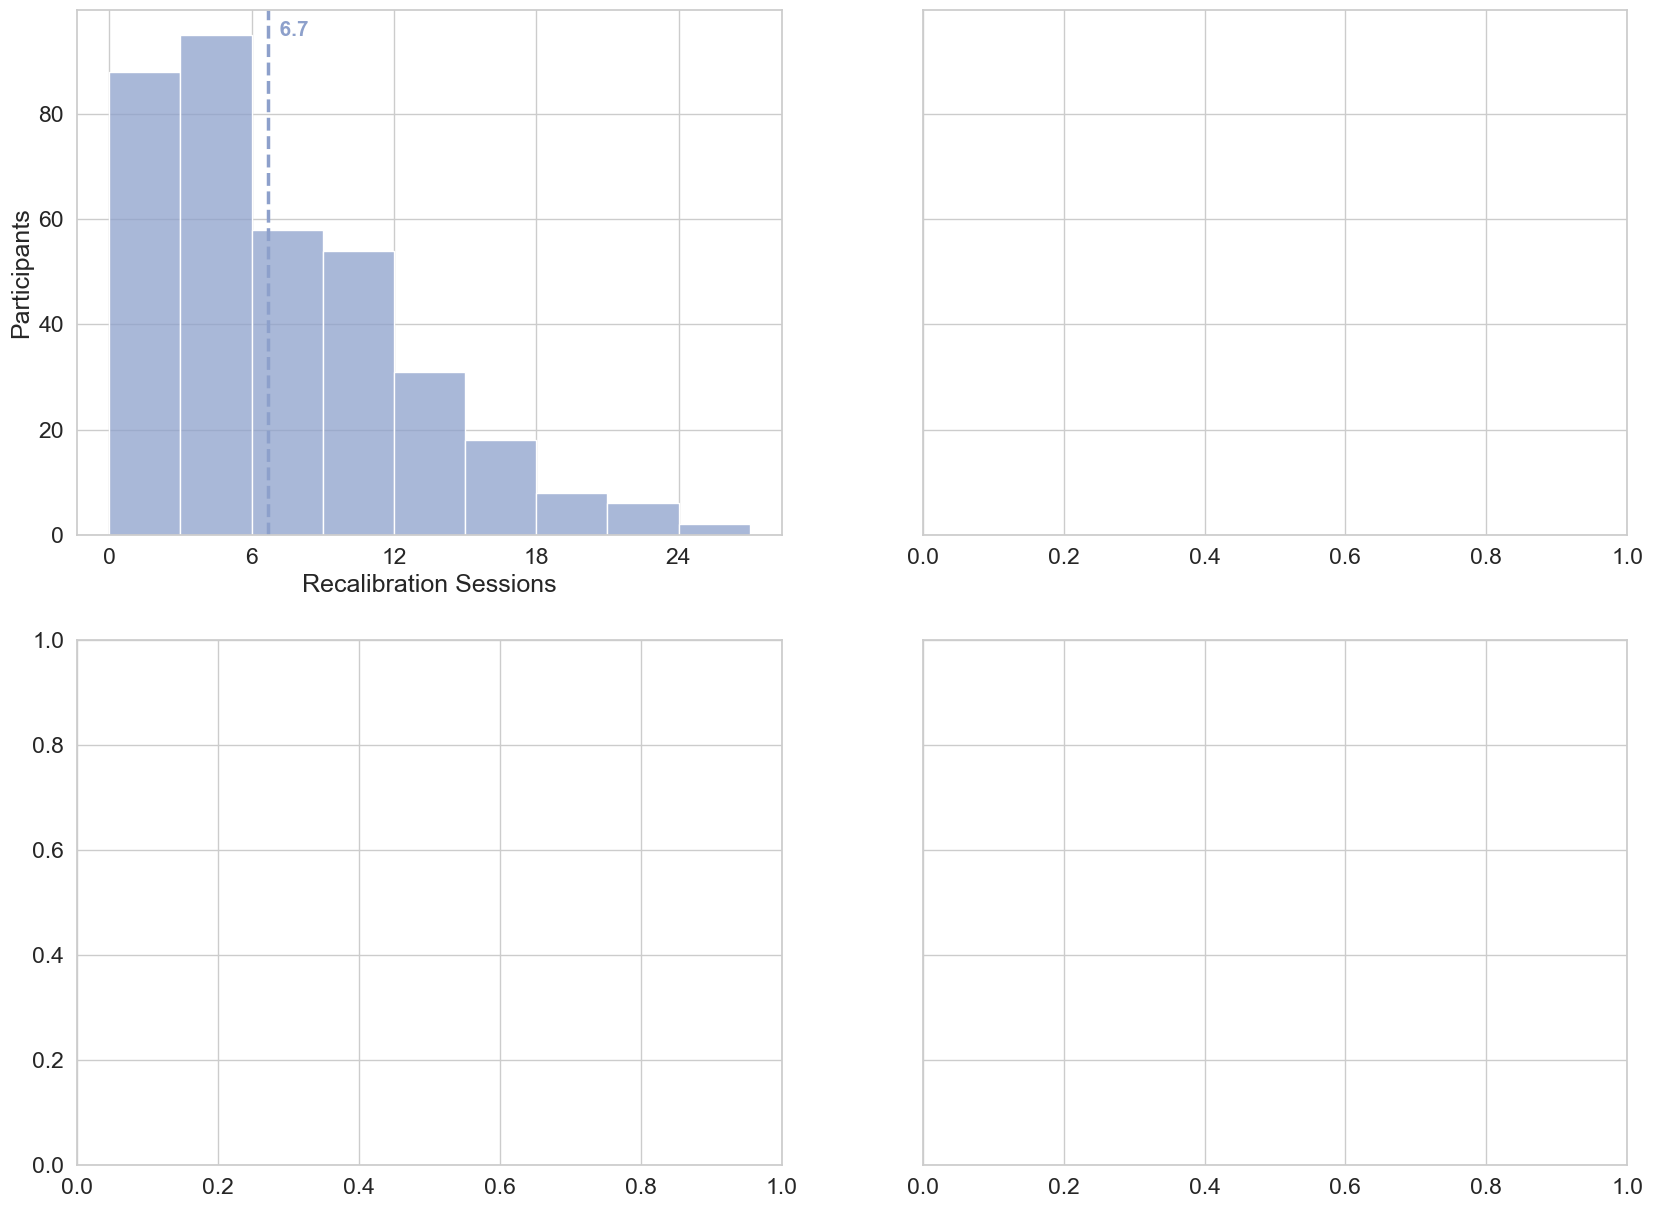

In [13]:
sns.set_context("paper", font_scale=2)
sns.set_theme(font_scale=1.5, style="whitegrid")
# Create Figure 2
fig_colors = "#8da0cb"  # "#a1c9f4"
colors = ["#66c2a5", "#fc8d62"]
color_dict = {
    "p": colors[0],
    "n": colors[1],
}
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 15), sharey="row")

data = SESSION_SUMMARY.copy()
# Plot 1: Number of Recalibrations
axes[0, 0] = sns.histplot(
    data,
    x="Recalibration Count",
    color=fig_colors,
    ax=axes[0, 0],
    binrange=(0, 27),
    binwidth=3,
)
axes[0, 0].set(ylabel="Participants")
axes[0, 0].set(xlabel="Recalibration Sessions")
axes[0, 0].axvline(session_interruptions.mean(), color=fig_colors, ls="--", lw=2.5)
axes[0, 0].set_xticks(np.arange(0, 28, 6)) 

# Display mean value as text on the plot
axes[0, 0].text(
    session_interruptions.mean(),  # x-coordinate (same as mean value)
    axes[0, 0].get_ylim()[1] * 0.95,  # y-coordinate (adjust as needed)
    f"  {session_interruptions.mean():.1f}",  # Label text
    color=fig_colors,
    ha="left",
    fontsize=15,
    fontweight="bold"
)

# Plot 2: Validations
axes[0, 1] = sns.histplot(
    validation_error,
    x="Mean Validation Error",
    color=fig_colors,
    ax=axes[0, 1],
    binrange=(0.1, 0.5),
    binwidth=0.025,
)
axes[0, 1].set(ylabel="")
axes[0, 1].set(xlabel="Validation Error (degrees)")
axes[0, 1].axvline(
    validation_error.avg_avg_val_error.mean(), color=fig_colors, ls="--", lw=2.5
)
axes[0, 1].set_xticks(np.arange(0.1, 0.51, 0.1))

axes[0, 1].text(
    validation_error.avg_avg_val_error.mean(), 
    axes[0, 1].get_ylim()[1] * 0.95, 
    f"  {validation_error.avg_avg_val_error.mean():.2f}", 
    color=fig_colors,
    ha="left",
    fontsize=15,
    fontweight="bold"
)

# Plot 3: Experiment Duration
axes[1, 0] = sns.histplot(
    data,
    x="Total Session Duration",
    color=fig_colors,
    ax=axes[1, 0],
    binrange=(25, 115),
    binwidth=5,
)
axes[1, 0].axvline(data.total_duration.mean(), color=fig_colors, ls="--", lw=2.5)
axes[1, 0].set(ylabel="Participants")
axes[1, 0].set(xlabel="Experiment Duration (minutes)")

axes[1, 0].text(
    data.total_duration.mean(),  
    axes[1, 0].get_ylim()[1] * 1,  
    f"  {data.total_duration.mean():.1f}",  
    color=fig_colors,
    ha="left",
    fontsize=15,
    fontweight="bold"
)

# Plot 4: Reading Comprehension Score
condition_labels = [
    "Hunting",
    "Gathering",
]

axes[1, 1] = sns.histplot(
    data=data,
    x="Comprehension Score - Regular Trials",
    palette=color_dict,
    ax=axes[1, 1],
    hue="batch_condition",
    multiple="layer",
    binrange=(45, 100),
    binwidth=5,
)

axes[1, 1].legend(
    # handles=handles,
    labels=condition_labels,
    title="Condition",
    loc="upper left",
)
axes[1, 1].set(xlabel="Reading Comprehension Accuracy")
axes[1, 1].set(ylabel="")
axes[1, 1].axvline(
    comprehension_gathering,
    color=colors[1],
    ls="--",
    lw=2.5,
)

axes[1, 1].text(
    comprehension_gathering,  
    axes[1, 1].get_ylim()[1] * 0.96,  
    f"  {comprehension_gathering:.1f}",  
    color=colors[1],
    ha="left",
    fontsize=15,
    fontweight="bold"
)

axes[1, 1].axvline(
    comprehension_hunting,
    color=colors[0],
    ls="--",
    lw=2.5,
)

axes[1, 1].text(
    comprehension_hunting,  
    axes[1, 1].get_ylim()[1] * 0.96,  
    f"  {comprehension_hunting:.1f}",  
    color=colors[0],
    ha="left",
    fontsize=15,
    fontweight="bold"
)


# Add labels (a, b, c, d) to each subplot
axes[0, 0].text(
    -0.1,
    1.05,
    "a)",
    transform=axes[0, 0].transAxes,
    fontsize=16,
    fontweight="bold",
    va="top",
)
axes[0, 1].text(
    -0.1,
    1.05,
    "b)",
    transform=axes[0, 1].transAxes,
    fontsize=16,
    fontweight="bold",
    va="top",
)
axes[1, 0].text(
    -0.1,
    1.05,
    "c)",
    transform=axes[1, 0].transAxes,
    fontsize=16,
    fontweight="bold",
    va="top",
)
axes[1, 1].text(
    -0.1,
    1.05,
    "d)",
    transform=axes[1, 1].transAxes,
    fontsize=16,
    fontweight="bold",
    va="top",
)

# increase font size
for ax in axes.flat:
    ax.tick_params(axis="both", which="major", labelsize=20)

# increase axis font size

# Set facecolor for the figure
fig.set_facecolor("white")

# Adjust layout
plt.tight_layout()

# Save the plot as pdf
plt.savefig(fig_save_path / "exp_stats.pdf")

# Show the plot
plt.show()

# 3.1 Textual Materials

In [ ]:
# Number of unique articles
unique_articles = onestop_qa.drop_duplicates(subset=["title"])
print(f"Total number of unique articles: {len(unique_articles)}")

Total number of unique articles: 30


In [32]:
# Number of unique paragraphs
unique_paragraphs = onestop_qa.drop_duplicates(subset=["paragraph"]).query("level!=1")
number_of_paragraphs = len(unique_paragraphs)/2
print(f"Total number of unique paragraphs: {number_of_paragraphs}")

Total number of unique paragraphs: 162.0


In [34]:
# Advanced word tokens
adv_qa = unique_paragraphs[unique_paragraphs["level"] == 0]
adv_qa_words = [
    word
    for paragraph in utils.get_number_of_tokens(adv_qa, "paragraph")
    for word in paragraph
]

adv_sentences = [
    sen
    for paragraph in utils.get_number_of_tokens(adv_qa, "paragraph")
    for sen in paragraph
    if "." in sen
]

print(f"OneStopQA Advanced Words Count: {len(adv_qa_words)}")
print(f"mean paragraph length (words): {round(len(adv_qa_words) / number_of_paragraphs,1)}")
print(f"mean sentence length (words): {round(len(adv_qa_words) / len(adv_sentences),1)}")

OneStopQA Advanced Words Count: 19425
mean paragraph length (words): 119.9
mean sentence length (words): 20.8


In [36]:
# Elementary word tokens
ele_qa = unique_paragraphs[unique_paragraphs["level"] == 2]
ele_qa_words = [
    word
    for paragraph in utils.get_number_of_tokens(ele_qa, "paragraph")
    for word in paragraph
]

ele_sentences = [
    sen
    for paragraph in utils.get_number_of_tokens(ele_qa, "paragraph")
    for sen in paragraph
    if "." in sen
]
print(f"OneStopQA Elementary Words Count: {len(ele_qa_words)}")
print(f"mean paragraph length (words): {round(len(ele_qa_words) / number_of_paragraphs,1)}")
print(f"mean sentence length (words): {round(len(ele_qa_words) / len(ele_sentences),1)}")


OneStopQA Elementary Words Count: 15737
mean paragraph length (words): 97.1
mean sentence length (words): 17.0


In [37]:
# Number of unique questions
onsqa_q = onestop_qa.drop_duplicates(subset=["paragraph_index", "question"])
onsqa_q_words = onsqa_q["question"]

print(f"Number of unique questions in OneStopQA: {len(onsqa_q)}")
print(
    f"Average length of questions in OneStopQA: {round(utils.get_average_length(onsqa_q_words),1)}"
)

Number of unique questions in OneStopQA: 486
Average length of questions in OneStopQA: 9.9


In [43]:
# number of unique answers
onestop_qa["answers_tuple"] = onestop_qa["answers"].apply(tuple)
onsqa_a = onestop_qa.drop_duplicates(subset=["question", "answers_tuple"])
onsqa_a = onsqa_a.drop(columns=["answers_tuple"])
answers_df = pd.DataFrame(onsqa_a["answers"].tolist(), columns=["a", "b", "c", "d"])
onsqa_a = onsqa_a.reset_index(drop=True)
onsqa_a = pd.concat([onsqa_a, answers_df], axis=1)
a = onsqa_a["a"].tolist()
b = onsqa_a["b"].tolist()
c = onsqa_a["c"].tolist()
d = onsqa_a["d"].tolist()
unique_answers = a + b + c + d

print(f"Total Unique Answers: {len(onsqa_a)}")
print(f"Mean Length of 'a': {round(utils.get_average_length(a),1)}")
print(f"Mean Length of 'b': {round(utils.get_average_length(b),1)}")
print(f"Mean Length of 'c': {round(utils.get_average_length(c),1)}")
print(f"Mean Length of 'd': {round(utils.get_average_length(d),1)}")
print(
    f"Mean Length of All Unique Answers: {round(utils.get_average_length(unique_answers),1)}"
)

Total Unique Answers: 486
Mean Length of 'a': 7.1
Mean Length of 'b': 7.5
Mean Length of 'c': 7.9
Mean Length of 'd': 6.8
Mean Length of All Unique Answers: 7.3


In [39]:
# mean length of the critical span (a_span)
onsqa_a_span = unique_paragraphs["a_span"]
total_words_a = []
for a in onsqa_a_span:
    words = a[1] - a[0] + 1
    total_words_a.append(words)
mean_a = sum(total_words_a) / len(total_words_a)
print(f"Mean Length of Critical Span (a_span): {round(mean_a,1)}")
# mean length of the distractor span (d_span)
onsqa_d_span = unique_paragraphs["d_span"]
total_words_d = []
for d in onsqa_d_span:
    words = d[1] - d[0] + 1
    total_words_d.append(words)
mean_d = sum(total_words_d) / len(total_words_d)
print(f"Mean Length of Distractor Span (d_span): {round(mean_d,1)}")

Mean Length of Critical Span (a_span): 31.6
Mean Length of Distractor Span (d_span): 12.9


# 3.3 Participants

In [40]:
# participants recruited from:
data_collection_sites = SESSION_SUMMARY["Data Collection Site"].value_counts()
print(data_collection_sites)

Data Collection Site
MIT         303
Technion     57
Name: count, dtype: int64
